# SALES FORECASTING ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
#data link - https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
df = pd.read_csv('sales_prediction.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Identifying missing values**

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values**

In [6]:
import pandas as pd

# Assuming df is your DataFrame
# Replace missing values in 'Item_Weight' with the mean of the column
mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Replace missing values in 'Outlet_Size' with the mode (most frequent value) of the column
mode_outlet_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_outlet_size, inplace=True)


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

**Basic EDA**

**Only showing the float and int type columns not object type**

In [9]:
num_data = df.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [10]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Maximum outlet type sales?**

In [11]:
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
max_sales_outlet_type = sales_by_outlet_type.idxmax()
max_sales = sales_by_outlet_type.max()
print(f"The outlet type with maximum sales is '{max_sales_outlet_type}' with total sales of {max_sales:.2f}")

The outlet type with maximum sales is 'Supermarket Type1' with total sales of 12917342.26


**Maximum outlet location type sales?**

In [12]:
sales_by_location_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
max_sales_location_type = sales_by_location_type.idxmax()
max_sales_location = sales_by_location_type.max()
print(f"The location type with maximum sales is '{max_sales_location_type}' with total sales of {max_sales_location:.2f}")

The location type with maximum sales is 'Tier 3' with total sales of 7636752.63


**Which Item fat Content has more sales?**

In [13]:
sales_by_fat_content = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
max_sales_fat_content = sales_by_fat_content.idxmax()
max_sales_fat = sales_by_fat_content.max()
print(f"The item fat content with maximum sales is '{max_sales_fat_content}' with total sales of {max_sales_fat:.2f}")

The item fat content with maximum sales is 'Low Fat' with total sales of 11015025.16


**Which Item Type has more sales?**

In [14]:
sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
max_sales_item_type = sales_by_item_type.idxmax()
max_sales = sales_by_item_type.max()
print(f"The item type with maximum sales is '{max_sales_item_type}' with total sales of {max_sales:.2f}")

The item type with maximum sales is 'Fruits and Vegetables' with total sales of 2820059.82


**Data viusalization for numeric columns**

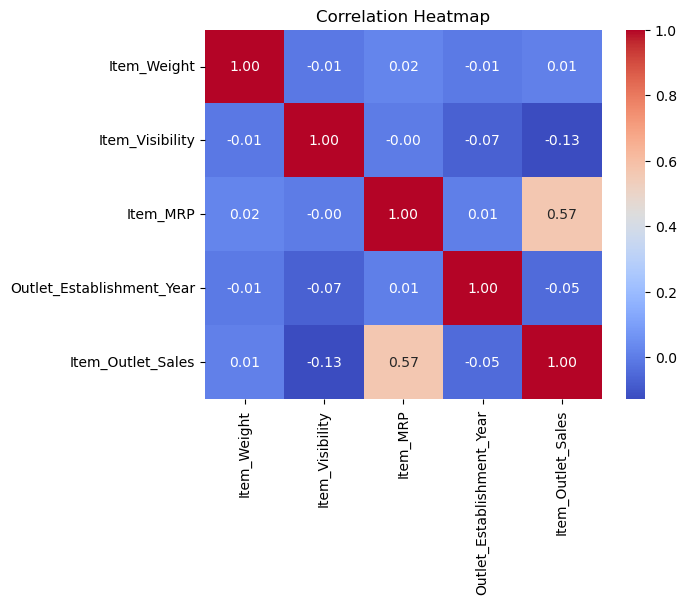

In [15]:
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

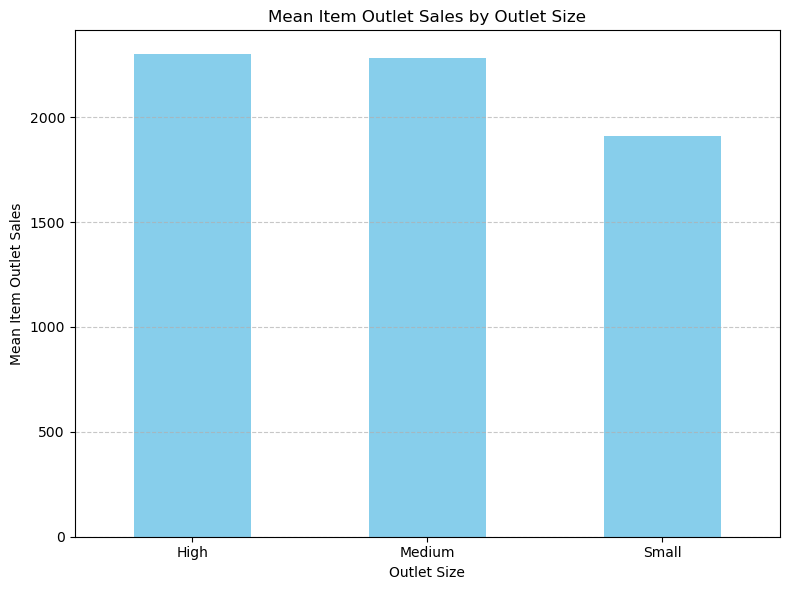

In [16]:
sales_by_outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(8, 6))
sales_by_outlet_size.plot(kind='bar', color='skyblue')
plt.xlabel('Outlet Size')
plt.ylabel('Mean Item Outlet Sales')
plt.title('Mean Item Outlet Sales by Outlet Size')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


<Axes: ylabel='Item_Weight'>

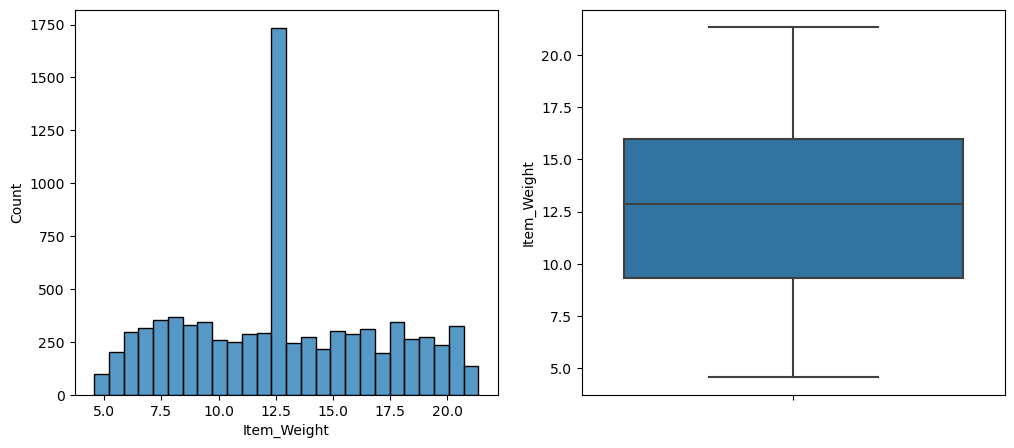

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=df, x='Item_Weight', ax=ax[0])
sns.boxplot(data=df, y='Item_Weight', ax=ax[1])

<Axes: ylabel='Item_MRP'>

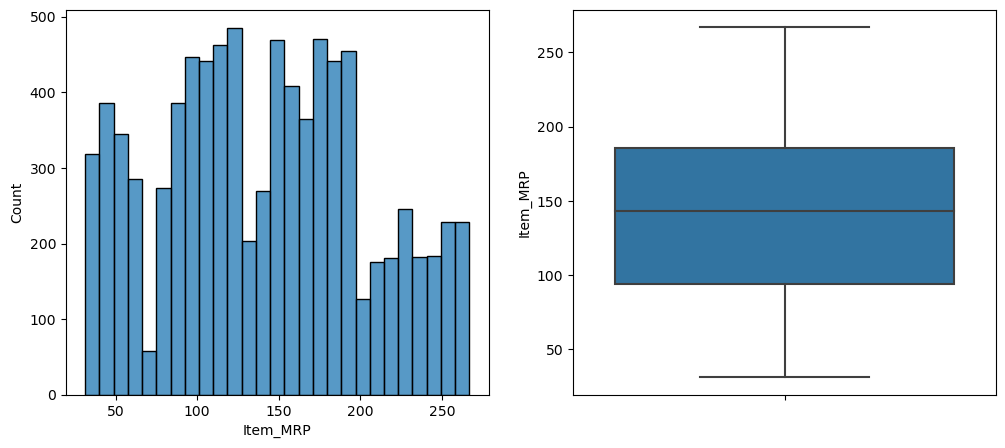

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=df, x='Item_MRP', ax=ax[0])
sns.boxplot(data=df, y='Item_MRP', ax=ax[1])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

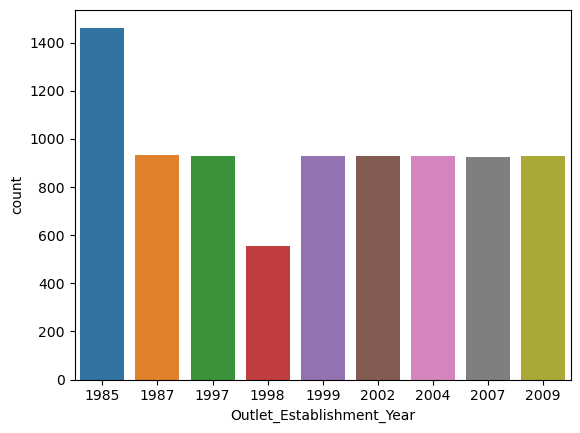

In [19]:
sns.countplot(data=df, x='Outlet_Establishment_Year')